# Linear and Logistic Regression Analysis

I will be practicing supervised learning techniques gained from the machine learning course. While insurance.csv dataset is used throughout the process, it is to be noted that I do not intend to educe any meaningful outcome from the data. The data is solely used to implement the machine learning techniques. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy

In [2]:
df = pd.read_csv("Datasets/insurance.csv")
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

The dataset consists of 1338 examples with 7 columns. The columns are:

| Features     | Data     |
| ----------- | ----------- |
| age    | 18-64   |
| sex    | female/male    |
| bmi    | 16.0-53.1   |
| children    | 0-5    |
| smoker    | yes/no    |
| region    | SE/SW/NE/NW    |
| charges    | 1120-63800    |

# Linear Regression

Firstly, I will practice linear regression. The model function is:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

Here, if x contains only one feature, it is called the univariate linear regression. 
If x is a vector with more than one feature, then it is called multivariate linear regression.

Firstly, I will choose x as age, y as charges to carry out univariate linear regression.

## Univariate Linear Regression(Age vs Charges)

In [3]:
print(type(df))

#extracting a column from df and converting data from type DataFrame to nparray
age = df['age'].to_numpy()
charges = df['charges'].to_numpy()
print(type(age), type(charges))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


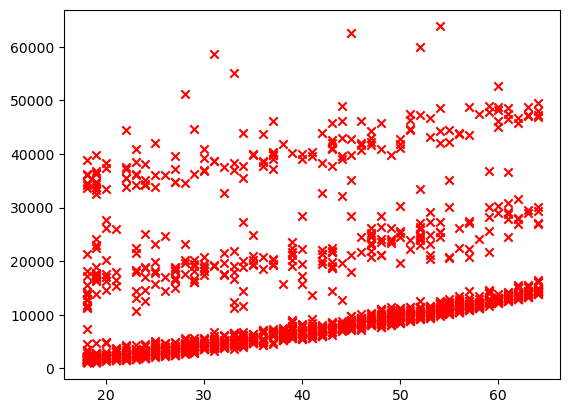

In [4]:
#Visualizing age vs charges
plt.scatter(age, charges, marker = 'x', c='r')

Before proceeding with the linear regression analysis, I will first scale the two features such that they have similar range. 

### Feature Scaling

In [5]:
#The following is z-score normalization
Xmu     = np.mean(age,axis=0)   
Xsigma  = np.std(age,axis=0) 
X_mean = (age - Xmu)
X_norm = (age - Xmu)/Xsigma 

Ymu     = np.mean(charges,axis=0)   
Ysigma  = np.std(charges,axis=0) 
Y_mean = (charges - Ymu)
Y_norm = (charges - Ymu)/Ysigma 

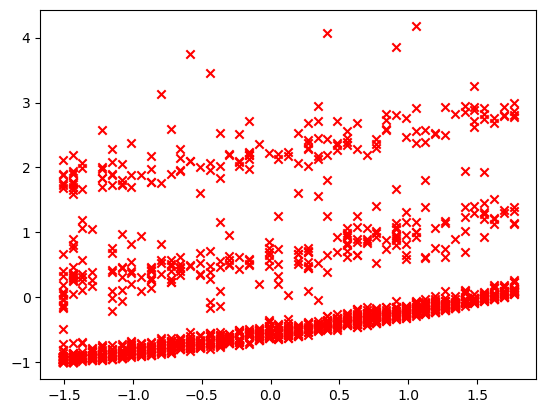

In [26]:
#Visualizing the scaled age vs charges data
plt.scatter(X_norm, Y_norm, marker = 'x', c='r')

Linear regression attempts to find the set of parameters w and b, which best fits the given dataset. 
In other words, linear regression tries to find the parameters that reduce the error. Error can be measured by 'cost'. In linear regression, MSE is often used to compute the cost. 

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$ 

In [13]:
#Function to compute cost
def compute_cost(x, y, w, b):
    """
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

Once the compute_cost function computes the cost for some initial parameters w and b, the values of w and b have to be changed such that the new cost for adjusted parameters decreases. This is done by gradient descent. 

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}   \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

The derivative terms are as follows

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$

In [14]:
#Function to compute gradient(derivative terms)
def compute_gradient(x, y, w, b): 
    """
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [15]:
#Function to implement gradient descent, updating each parameters w and b every iteration
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [39]:
#carrying out gradient descent on age vs charges

# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-3
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X_norm, Y_norm, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 5.00e-01  dj_dw: -2.990e-01, dj_db:  6.007e-17   w:  2.990e-04, b:-6.00748e-20
Iteration 1000: Cost 4.61e-01  dj_dw: -1.099e-01, dj_db:  7.468e-18   w:  1.892e-01, b:-3.33844e-17
Iteration 2000: Cost 4.56e-01  dj_dw: -4.043e-02, dj_db: -1.037e-17   w:  2.586e-01, b:-2.90819e-17
Iteration 3000: Cost 4.55e-01  dj_dw: -1.486e-02, dj_db:  3.037e-17   w:  2.842e-01, b:-2.77785e-17
Iteration 4000: Cost 4.55e-01  dj_dw: -5.466e-03, dj_db:  2.149e-17   w:  2.935e-01, b:-2.77697e-17
Iteration 5000: Cost 4.55e-01  dj_dw: -2.010e-03, dj_db: -1.610e-17   w:  2.970e-01, b:-2.77481e-17
Iteration 6000: Cost 4.55e-01  dj_dw: -7.389e-04, dj_db: -5.991e-17   w:  2.983e-01, b:-2.77295e-17
Iteration 7000: Cost 4.55e-01  dj_dw: -2.717e-04, dj_db: -3.900e-18   w:  2.987e-01, b:-2.77626e-17
Iteration 8000: Cost 4.55e-01  dj_dw: -9.991e-05, dj_db:  3.153e-18   w:  2.989e-01, b:-2.77367e-17
Iteration 9000: Cost 4.55e-01  dj_dw: -3.673e-05, dj_db:  8.630e-18   w:  2.990e-01, b:-2.77544e-17


The cost seems to converge at a value around 4.55e-01. The convergence means that we have found a set of values for parameters w and b that nearly minimizes the cost. Let's plot the line of best fit against the datasets. 

In [42]:
#Function to computes the prediction of a linear model
def compute_model_output(x, w, b):
    """
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

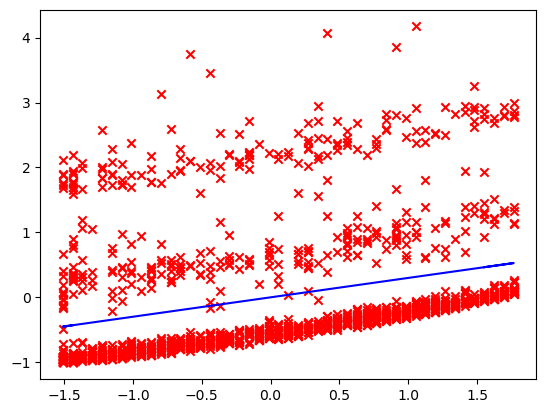

In [44]:
#Visualizing the scaled age vs charges data
plt.scatter(X_norm, Y_norm, marker = 'x', c='r')

tmp_f_wb= compute_model_output(X_norm, w_final, b_final)
plt.plot(X_norm, tmp_f_wb, c='b',label='Our Prediction')

We've found the parameters w and b that minimizes MSE through gradient descent. 



# Multivariate Linear Regression

I will extend the same concept and apply linear regression to more than one feature. As seen earlier, insurance.csv data consisted of features such as age, gender, bmi, etc. For the multivariate linear regression analysis, I will use three features: age, bmi, smoker.

In [11]:
df['smoker'] = df['smoker'].eq('yes').mul(1)
mult_x = df[['age', 'bmi', 'smoker']].to_numpy()
print(df)

      age     sex     bmi  children  smoker     region      charges
0      19  female  27.900         0       1  southwest  16884.92400
1      18    male  33.770         1       0  southeast   1725.55230
2      28    male  33.000         3       0  southeast   4449.46200
3      33    male  22.705         0       0  northwest  21984.47061
4      32    male  28.880         0       0  northwest   3866.85520
...   ...     ...     ...       ...     ...        ...          ...
1333   50    male  30.970         3       0  northwest  10600.54830
1334   18  female  31.920         0       0  northeast   2205.98080
1335   18  female  36.850         0       0  southeast   1629.83350
1336   21  female  25.800         0       0  southwest   2007.94500
1337   61  female  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]


In [74]:
#The following is z-score normalization
multXmu     = np.mean(mult_x,axis=0) 
multXsigma  = np.std(mult_x,axis=0) 
multX_mean = (mult_x - multXmu)
multX_norm = (mult_x - multXmu)/multXsigma 

While the same concept as univariate linear regression is applied to multivariate linear regression, we now use vector quantities for the features as well as the parameter w. 
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  $$ 
The cost, with multiple variable is represented as 
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

In [77]:
#Function to compute cost of multivariate linear regression
def compute_cost(X, y, w, b): 
    """
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

Gradient descent for multivariate linear regression also changes by a bit 
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$
It can be seen that the adjustment of the parameter w is done for the number of features. The derivative terms are the same.
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$

In [78]:
#Function to compute the gradient for multivariate linear regression 
def compute_gradient(X, y, w, b): 
    """
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [79]:
#    Performs batch gradient descent to learn w and b. Updates w and b by taking num_iters gradient steps with learning rate alpha
    
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [89]:
# initialize parameters
initial_w = np.zeros(multX_norm.shape[1])
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-3
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(multX_norm, Y_norm, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost     0.50   
Iteration  100: Cost     0.26   
Iteration  200: Cost     0.18   
Iteration  300: Cost     0.14   
Iteration  400: Cost     0.13   
Iteration  500: Cost     0.13   
Iteration  600: Cost     0.13   
Iteration  700: Cost     0.13   
Iteration  800: Cost     0.13   
Iteration  900: Cost     0.13   
b,w found by gradient descent: -0.00,[0.29869346 0.16266294 0.78862905] 


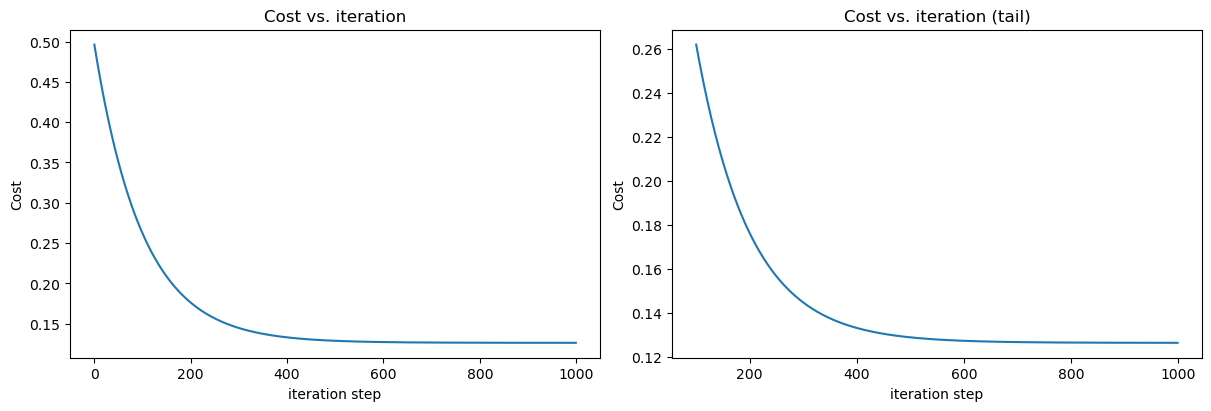

In [90]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

Again, it can be seen that the cost converges to a value of about 0.13 after 1000 iterations. Hence it can be seen that the multivariate linear regression was able to identify a set of values for w and b that minimizes the cost. 

# Logistic Regression(Classification)
Next up on the list is logistic regression. Logistic regression aims to predict the outcome not in a continuous spectrum, but as discrete values. Hence instead of the linear model of the function, sigmoid function is used.
$$g(z) = \frac{1}{1+e^{-z}}$$
In the case of logistic regression, 
$$z=\mathbf{w} \cdot \mathbf{x}^{(i)} + b$$

In [29]:
#Data used in the investigation
x_train = X_norm[['age', 'charges']].to_numpy()
y_train = df['smoker']. to_numpy()
print(x_train.shape, y_train.shape)

(1338, 2) (1338,)


In [39]:
#The following is z-score normalization
logXmu     = np.mean(x_train,axis=0) 
logXsigma  = np.std(x_train,axis=0) 
logX_mean = (x_train - logXmu)
logX_norm = (x_train - logXmu)/logXsigma 

In [14]:
#Function to implement the sigmoid function
def sigmoid(z):
    """
    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
    """

    g = 1/(1+np.exp(-z))
   
    return g

The cost function is also different for sigmoid function. 
$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] $$

and loss is 
 $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) $$

In [15]:
#Function to compute logistic cost
def compute_cost_logistic(X, y, w, b):
    """
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost

Just like linear regression, the cost function aims to numerically estimate how close the parameters w and b are to the best fit of line on the data. Therefore, gradient descent has to be carried out in which w and b are constantly adjusted to minimize the cost function. Gradient descent is the same as the one applied to linear regression. However, $f$ function of course, has to be adjusted to the new sigmoid function.

In [16]:
#Function to compute the gradient of a logistic function
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

In [32]:
#Function to implement gradient descent on logistic regression
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


In [43]:
#Try gradient descent on the dataset
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(logX_norm, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6745618107654252   
Iteration 1000: Cost 0.1587731357621854   
Iteration 2000: Cost 0.1572287923140579   
Iteration 3000: Cost 0.15709222974565168   
Iteration 4000: Cost 0.15707620392934699   
Iteration 5000: Cost 0.1570741601523789   
Iteration 6000: Cost 0.15707389201873465   
Iteration 7000: Cost 0.1570738564839647   
Iteration 8000: Cost 0.15707385175743438   
Iteration 9000: Cost 0.1570738511279152   

updated parameters: w:[-1.20987012  3.5686856 ], b:-2.408598192874634


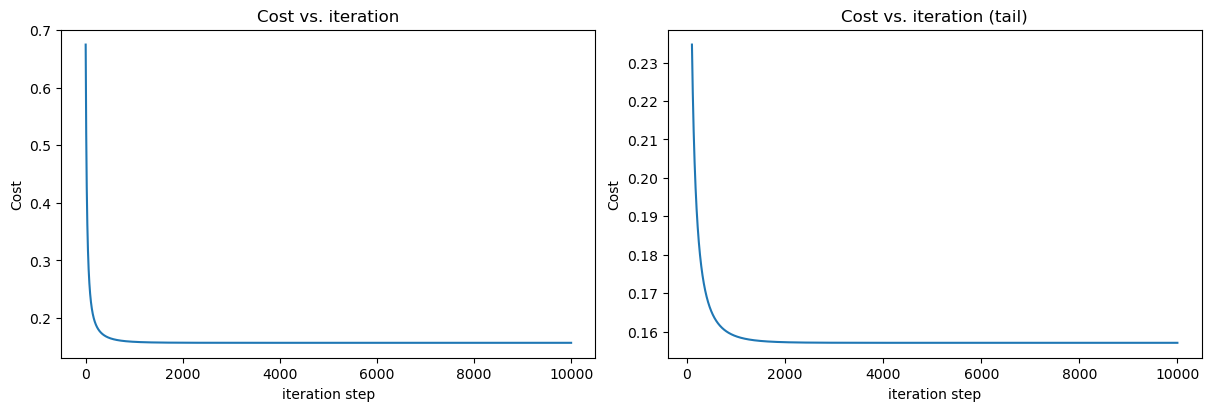

In [54]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(_)
ax2.plot(100 + np.arange(len(_[100:])), _[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

Again, it can be seen that the gradient descent for logistic regression has converged at a value around 0.16, which shows that the parameters w and b were adjusted to return the minimum cost. This marks the end of practice on linear and logistic regression. 

Areas to revisit and further examine:
- Regularization
- Learning rate optimization
- Polynomial regression

# Model evaluation and Selection

How do we know if the linear model is the best model in predicting the outcome? There has to be a way to quantify the performance of the model and be able to compare the results of different models. Here I aim to implement code to achieve such result, with the initial univariate example of age vs charges

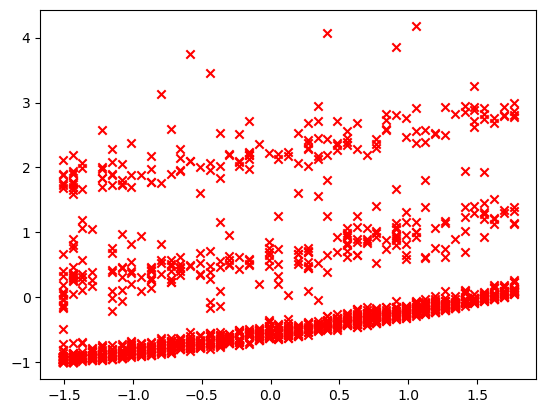

In [6]:
#Visualizing the scaled age vs charges data
plt.scatter(X_norm, Y_norm, marker = 'x', c='r')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [27]:
#Splitting the data into training, cross-validation, and test sets
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(X_norm, Y_norm, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_cv = x_cv.reshape(-1,1)
y_cv = y_cv.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (802, 1)
the shape of the training set (target) is: (802, 1)

the shape of the cross validation set (input) is: (268, 1)
the shape of the cross validation set (target) is: (268, 1)

the shape of the test set (input) is: (268, 1)
the shape of the test set (target) is: (268, 1)


In [28]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train)

LinearRegression()

In [29]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(x_train)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 0.45054367225599684
training MSE (for-loop implementation): 0.45054367225599695


In [30]:
# Feed the scaled cross validation set
yhat = linear_model.predict(x_cv)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 0.5098046968285004


In [32]:
def plot_train_cv_mses(degrees, train_mses, cv_mses, title):
    degrees = range(1,11)
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.title(title)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

Now, I will create more models that implement polynomial features.

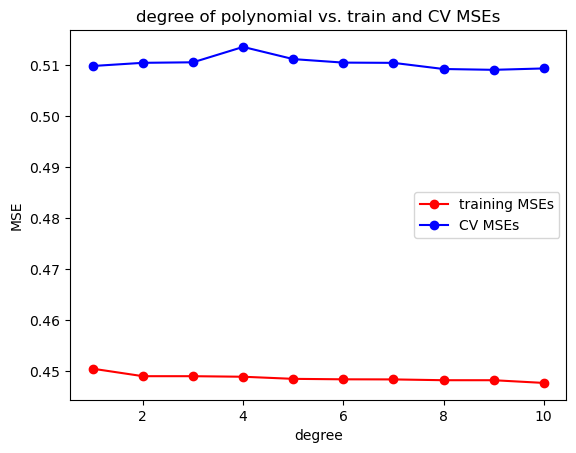

In [33]:
# Initialize lists to save the errors, models, and feature transforms
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    X_cv_mapped = poly.transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)
plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

In [34]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=9


In [35]:
# Add polynomial features to the test set
X_test_mapped = polys[degree-1].transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 0.45
Cross Validation MSE: 0.51
Test MSE: 0.42


While the MSE values don't seem to be affected drastically with varying degrees of polynomial, the process has found the polynomial's degree of 9 to be the most accurate. 